In [ ]:
# Importing libraries
import os
import pandas as pd
import random
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from IPython.core.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

### Getting the data

In [ ]:
# Getting IESC data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/ybsingh/indian-emotional-speech-corpora-iesc/versions/1/Indian Emotional Speech Corpora (IESC)'):
    for filename in filenames:
        if filename.endswith('.wav'):
            file_path = os.path.join(dirname, filename)
            paths.append(file_path)

            # Duration
            duration.append(round(librosa.get_duration(filename=file_path), 3))

            # Label extraction (Corrected for filenames like n-3-1-1.wav, s-9-8-1.wav, etc.)
            char_label = filename[0].lower()
            if char_label == 'a':
                label = 'angry'
            elif char_label == 'd':
                label = 'disgust'
            elif char_label == 'f':
                label = 'fear'
            elif char_label == 'h':
                label = 'happy'
            elif char_label == 'n':
                label = 'neutral'
            elif char_label == 's':
                label = 'sad'
            else:
                label = 'unknown' # Fallback for unexpected labels
            labels.append(label)

df_iesc = pd.DataFrame({'path': paths, 'duration': duration, 'dataset': 'IESC', 'emotion': labels})

df_iesc.sample(5)

path  duration dataset  \
199  /root/.cache/kagglehub/datasets/ybsingh/indian...     3.819    IESC   
384  /root/.cache/kagglehub/datasets/ybsingh/indian...     2.194    IESC   
182  /root/.cache/kagglehub/datasets/ybsingh/indian...     3.738    IESC   
244  /root/.cache/kagglehub/datasets/ybsingh/indian...     3.499    IESC   
521  /root/.cache/kagglehub/datasets/ybsingh/indian...     3.925    IESC   

     emotion  
199    happy  
384    angry  
182    happy  
244  neutral  
521     fear

In [ ]:
# Getting CREMA-D data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('/kaggle/input/cremad/AudioWAV'):
    for filename in filenames:
        if filename.endswith('.wav'):
            file_path = os.path.join(dirname, filename)
            paths.append(file_path)

            # Duration
            duration.append(round(librosa.get_duration(filename=file_path), 3))

            # Extract emotion code (3rd part of filename)
            label = filename.split('_')[2]
            if label == 'ANG':
                labels.append('angry')
            elif label == 'DIS':
                labels.append('disgust')
            elif label == 'FEA':
                labels.append('fear')
            elif label == 'HAP':
                labels.append('happy')
            elif label == 'NEU':
                labels.append('neutral')
            elif label == 'SAD':
                labels.append('sad')

df_crema = pd.DataFrame({'path': paths, 'duration': duration, 'dataset': 'CREMA-D', 'emotion': labels})

df_crema.sample(5)

path  duration  dataset  \
4225  /kaggle/input/cremad/AudioWAV/1086_TAI_FEA_XX.wav     2.369  CREMA-D   
6765  /kaggle/input/cremad/AudioWAV/1087_ITH_FEA_XX.wav     2.169  CREMA-D   
467   /kaggle/input/cremad/AudioWAV/1076_IEO_HAP_HI.wav     1.902  CREMA-D   
6030  /kaggle/input/cremad/AudioWAV/1035_IWL_SAD_XX.wav     2.636  CREMA-D   
4104  /kaggle/input/cremad/AudioWAV/1052_MTI_SAD_XX.wav     2.836  CREMA-D   

     emotion  
4225    fear  
6765    fear  
467    happy  
6030     sad  
4104     sad

In [ ]:
# Getting TESS data:
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('/kaggle/input/toronto-emotional-speech-set-tess'):
    for filename in filenames:

        paths.append(os.path.join(dirname, filename))

        duration.append(round(librosa.get_duration(filename=paths[-1]), 3))

        label = filename[::-1].split('_')[0][::-1]
        labels.append(label[:-4].lower())

df_tess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'TESS', 'emotion':labels})

df_tess['emotion'] = df_tess['emotion'].replace(['ps'], 'surprise')

df_tess.sample(5)

path  duration dataset  \
2207  /kaggle/input/toronto-emotional-speech-set-tes...     1.692    TESS   
337   /kaggle/input/toronto-emotional-speech-set-tes...     1.602    TESS   
2832  /kaggle/input/toronto-emotional-speech-set-tes...     1.946    TESS   
781   /kaggle/input/toronto-emotional-speech-set-tes...     2.374    TESS   
2518  /kaggle/input/toronto-emotional-speech-set-tes...     2.289    TESS   

      emotion  
2207    happy  
337     angry  
2832     fear  
781   disgust  
2518      sad

In [ ]:
# Getting RAVDESS data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('/kaggle/input/ravdess-emotional-speech-audio'):
    for filename in filenames:

        paths.append(os.path.join(dirname, filename))

        duration.append(round(librosa.get_duration(filename=paths[-1]), 3))

        label = filename[::-1].split('_')[0][::-1]

        if label[6:8] == '01':
            labels.append('neutral')
        elif label[6:8] == '02':
            labels.append('calm')
        elif label[6:8] == '03':
            labels.append('happy')
        elif label[6:8] == '04':
            labels.append('sad')
        elif label[6:8] == '05':
            labels.append('angry')
        elif label[6:8] == '06':
            labels.append('fear')
        elif label[6:8] == '07':
            labels.append('disgust')
        elif label[6:8] == '08':
            labels.append('surprise')

df_ravdess = pd.DataFrame({'path':paths,'duration': duration, 'dataset': 'RAVDESS', 'emotion':labels})

df_ravdess.sample(5)

path  duration  dataset  \
1445  /kaggle/input/ravdess-emotional-speech-audio/a...     3.704  RAVDESS   
911   /kaggle/input/ravdess-emotional-speech-audio/A...     3.770  RAVDESS   
1059  /kaggle/input/ravdess-emotional-speech-audio/A...     3.704  RAVDESS   
2671  /kaggle/input/ravdess-emotional-speech-audio/A...     3.270  RAVDESS   
1732  /kaggle/input/ravdess-emotional-speech-audio/a...     3.437  RAVDESS   

       emotion  
1445      fear  
911        sad  
1059      fear  
2671  surprise  
1732   neutral

In [ ]:
# Getting SAVEE data
paths, labels, duration = [], [], []

for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/barelydedicated/savee-database/versions/1/AudioData'):
    for filename in filenames:

        paths.append(os.path.join(dirname, filename))

        label = filename[::-1].split('_')[0][::-1]

        if label[:1] == 'a':
            labels.append('angry')
        elif label[:1] == 'd':
            labels.append('disgust')
        elif label[:1] == 'f':
            labels.append('fear')
        elif label[:1] == 'h':
            labels.append('happy')
        elif label[:1] == 'n':
            labels.append('neutral')
        elif label[:1] == 's':
            if label[:2] == 'sa':
                labels.append('sad')
            else:
                labels.append('surprise')

paths = paths[1:] # to filter out 'info.txt' file

for file in paths:
    duration.append(round(librosa.get_duration(filename=file), 3))

df_savee = pd.DataFrame({'path':paths, 'duration': duration, 'dataset': 'SAVEE', 'emotion':labels})

df_savee.sample(5)

path  duration dataset  \
405  /root/.cache/kagglehub/datasets/barelydedicate...     4.183   SAVEE   
134  /root/.cache/kagglehub/datasets/barelydedicate...     2.560   SAVEE   
20   /root/.cache/kagglehub/datasets/barelydedicate...     4.114   SAVEE   
317  /root/.cache/kagglehub/datasets/barelydedicate...     2.589   SAVEE   
159  /root/.cache/kagglehub/datasets/barelydedicate...     3.176   SAVEE   

     emotion  
405  neutral  
134    happy  
20   neutral  
317      sad  
159  neutral

In [ ]:
# Merge all 5 datasets together
df = pd.concat([df_tess, df_ravdess, df_savee, df_iesc, df_crema], ignore_index=True)

# Drop 'calm' samples (if present)
df = df[~df['emotion'].str.contains('calm', case=False, na=False)].reset_index(drop=True)

print(f"The merged dataset has {df.shape[0]} audio files. Below are 5 random entries:")

# Display 5 random rows
df.sample(5)

The merged dataset has 16618 audio files. Below are 5 random entries:


path  duration  dataset  \
3532   /kaggle/input/toronto-emotional-speech-set-tes...     2.404     TESS   
10103  /kaggle/input/cremad/AudioWAV/1016_IEO_ANG_MD.wav     2.269  CREMA-D   
15065  /kaggle/input/cremad/AudioWAV/1056_IWW_DIS_XX.wav     2.469  CREMA-D   
13092  /kaggle/input/cremad/AudioWAV/1064_TAI_ANG_XX.wav     3.303  CREMA-D   
103    /kaggle/input/toronto-emotional-speech-set-tes...     1.842     TESS   

       emotion  
3532   disgust  
10103    angry  
15065  disgust  
13092    angry  
103       fear

### Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16618 entries, 0 to 16617
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   path      16618 non-null  object 
 1   duration  16618 non-null  float64
 2   dataset   16618 non-null  object 
 3   emotion   16618 non-null  object 
dtypes: float64(1), object(3)
memory usage: 519.4+ KB


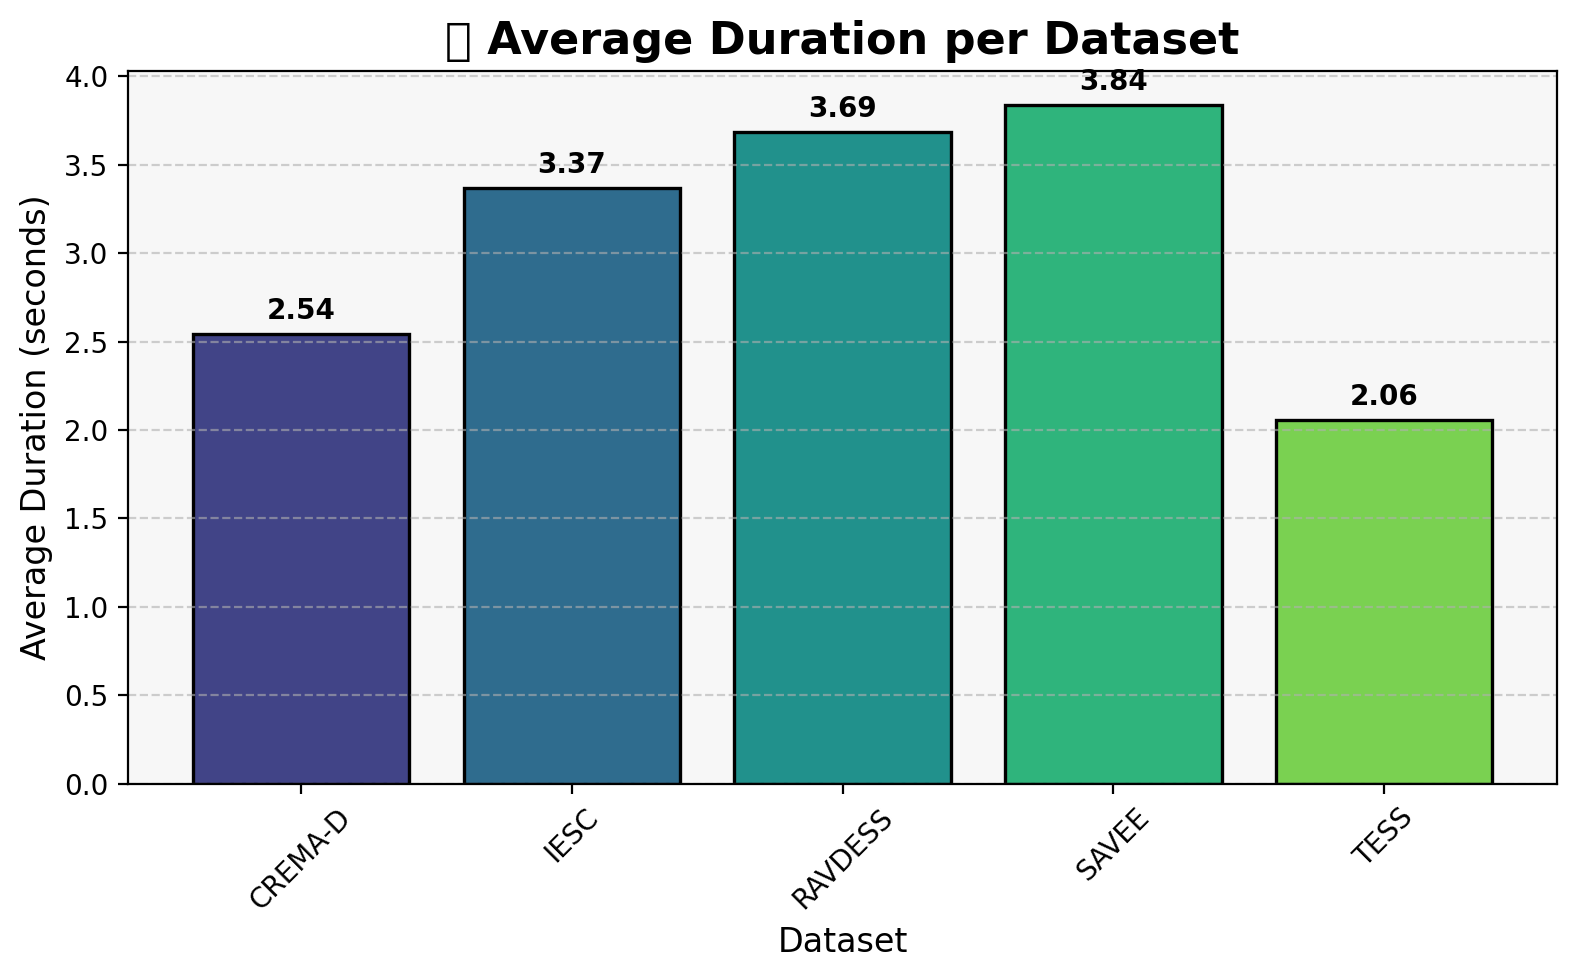

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: assuming you have a dataframe 'df' with columns 'dataset' and 'duration'

# Calculate average duration per dataset
avg_duration = df.groupby('dataset')['duration'].mean()

# Colors for each bar (optional: pick a palette)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(avg_duration)))  # smooth gradient

plt.figure(figsize=(8, 5))
bars = plt.bar(avg_duration.index, avg_duration.values, color=colors, edgecolor="black", linewidth=1.2)

# Add title and labels with styling
plt.title("🎵 Average Duration per Dataset", fontsize=16, fontweight='bold')
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Average Duration (seconds)", fontsize=12)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05,
             f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add subtle background
plt.gca().set_facecolor("#f7f7f7")
plt.tight_layout()
plt.show()

We can note that samples distribution is similar for each target, with 1100~1200 files per category. Overall, the samples length is similar across each source.

Finally, now let's look at what is **inside the audio files**, picking some random samples from different targets. In particular I want to check:
- the **waveforms**
- the **spectograms, with the fundamental frequency**
- the **Mel-frequency cepstrum components (MFCCs)**, as "two-dimensional images".
- and of course hear how they sound, using the built-in **media player** of python

In [ ]:
import librosa.display
import IPython.display as ipd
from IPython.core.display import display
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from librosa.feature import mfcc

# function to display samples information by emotion
# note that a random samples is generated each time the function is called
# this is on purpose as to check different samples of each emotion every time

def show_audio(emotion):
    # create sublots
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
    # filter dataframe to emotion)
    df_show = df.loc[df['emotion'] == emotion].reset_index(drop=True)
    index = random.randint(0, df_show.shape[0] - 1) # Corrected line: Adjusted upper bound for random.randint

    # load audio file:
    y, sr = librosa.load(df_show.path[index], sr=16000)

    # Show waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0])
    axs[0].set_title('Waveform')

    # Extract fundamental frequency (f0) using a probabilistic approach
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=50, fmax=1500, frame_length=2048)

    # Establish timepoint of f0 signal
    timepoints = np.linspace(0, df_show.duration[index], num=len(f0), endpoint=False)

    # Compute short-time Fourier Transform
    x_stft = np.abs(librosa.stft(y))

    # Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)

    # Plot STFT spectrogram
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log", ax=axs[1])

    # Plot fundamental frequency (f0) in spectrogram plot
    axs[1].plot(timepoints, f0, color="cyan", linewidth=4)
    axs[1].set_title('Spectrogram with fundamental frequency')

    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    x_mfccs = mfcc(y=y, sr=sr, n_mfcc=20)

    # Plot MFCCs
    librosa.display.specshow(x_mfccs, sr=sr, x_axis="time", norm=Normalize(vmin=-50, vmax=50), ax=axs[2])
    axs[2].set_title('MFCCs')

    # Show metadata in title
    plt.suptitle('File: {}  -  Emotion: {}'.format(df_show.path[index], df_show.emotion[index]), size=14)
    plt.tight_layout()
    plt.show()

    # Display media player for the selected file
    display(ipd.Audio(y, rate=sr))

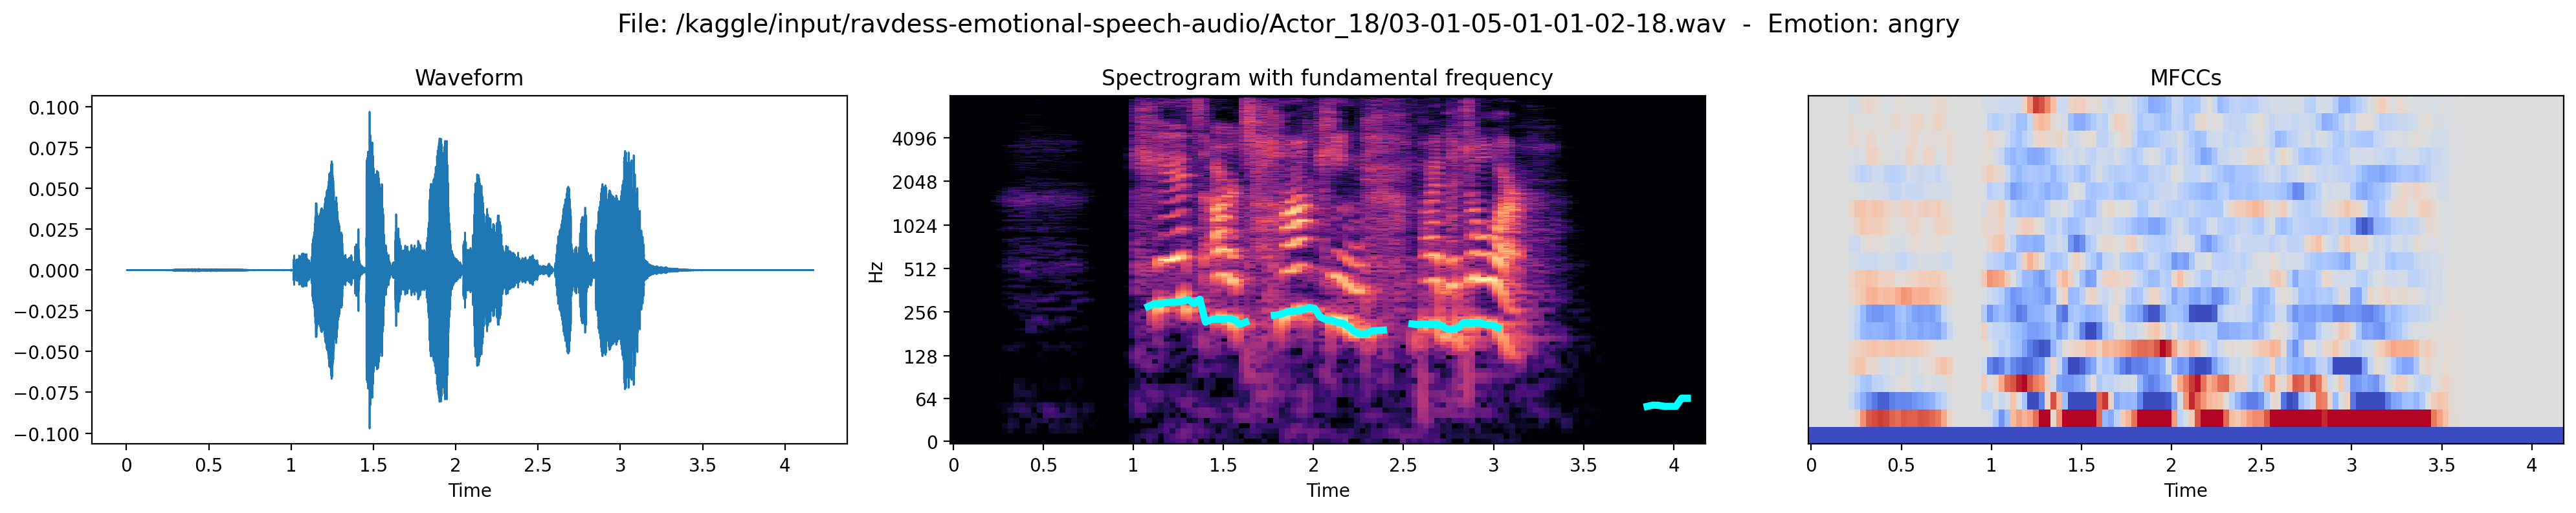

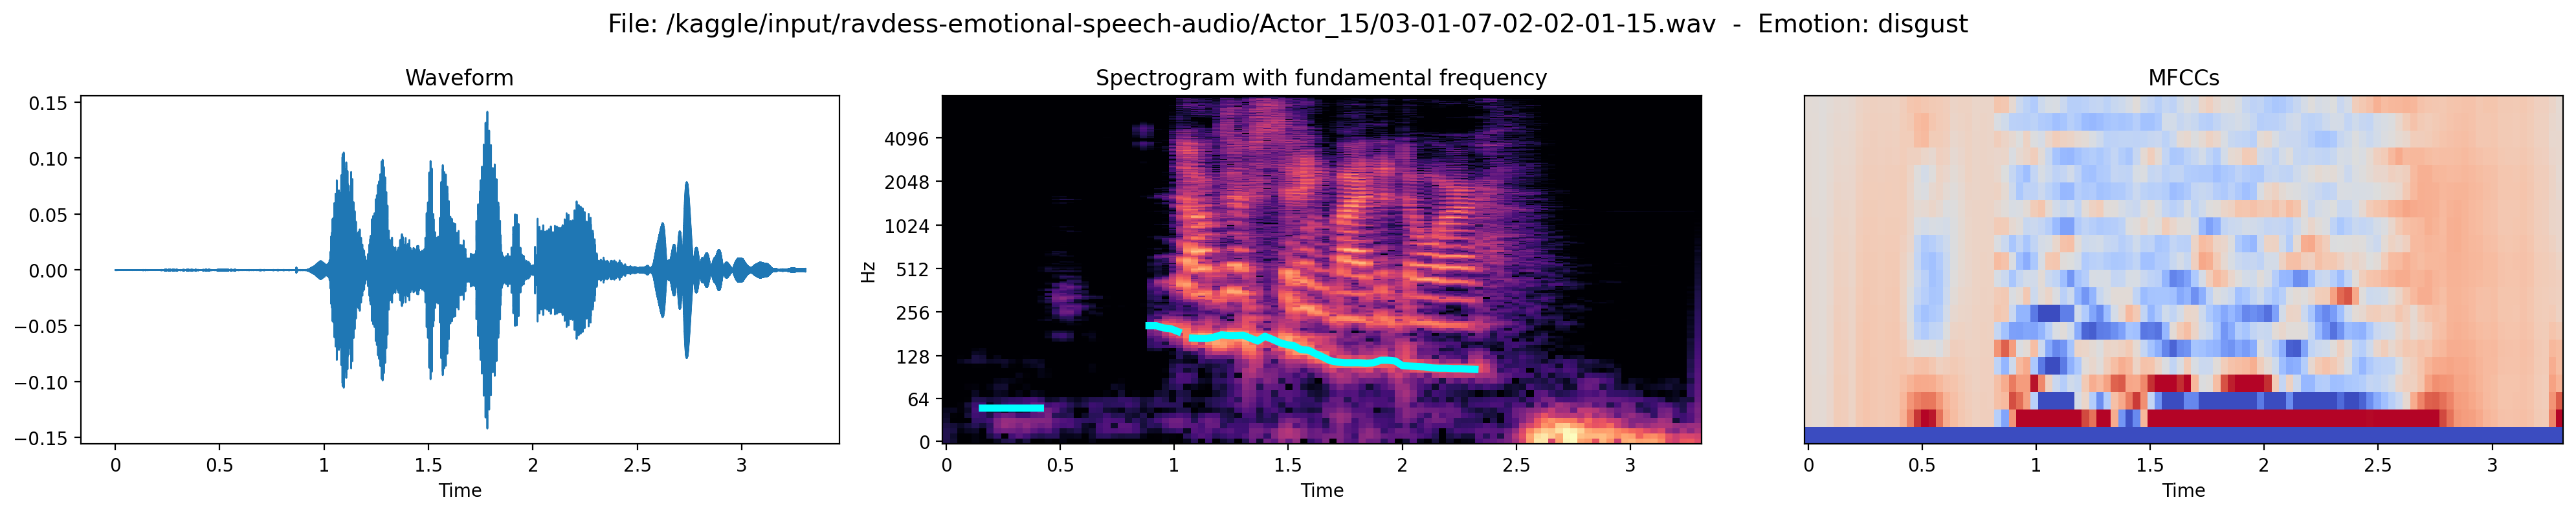

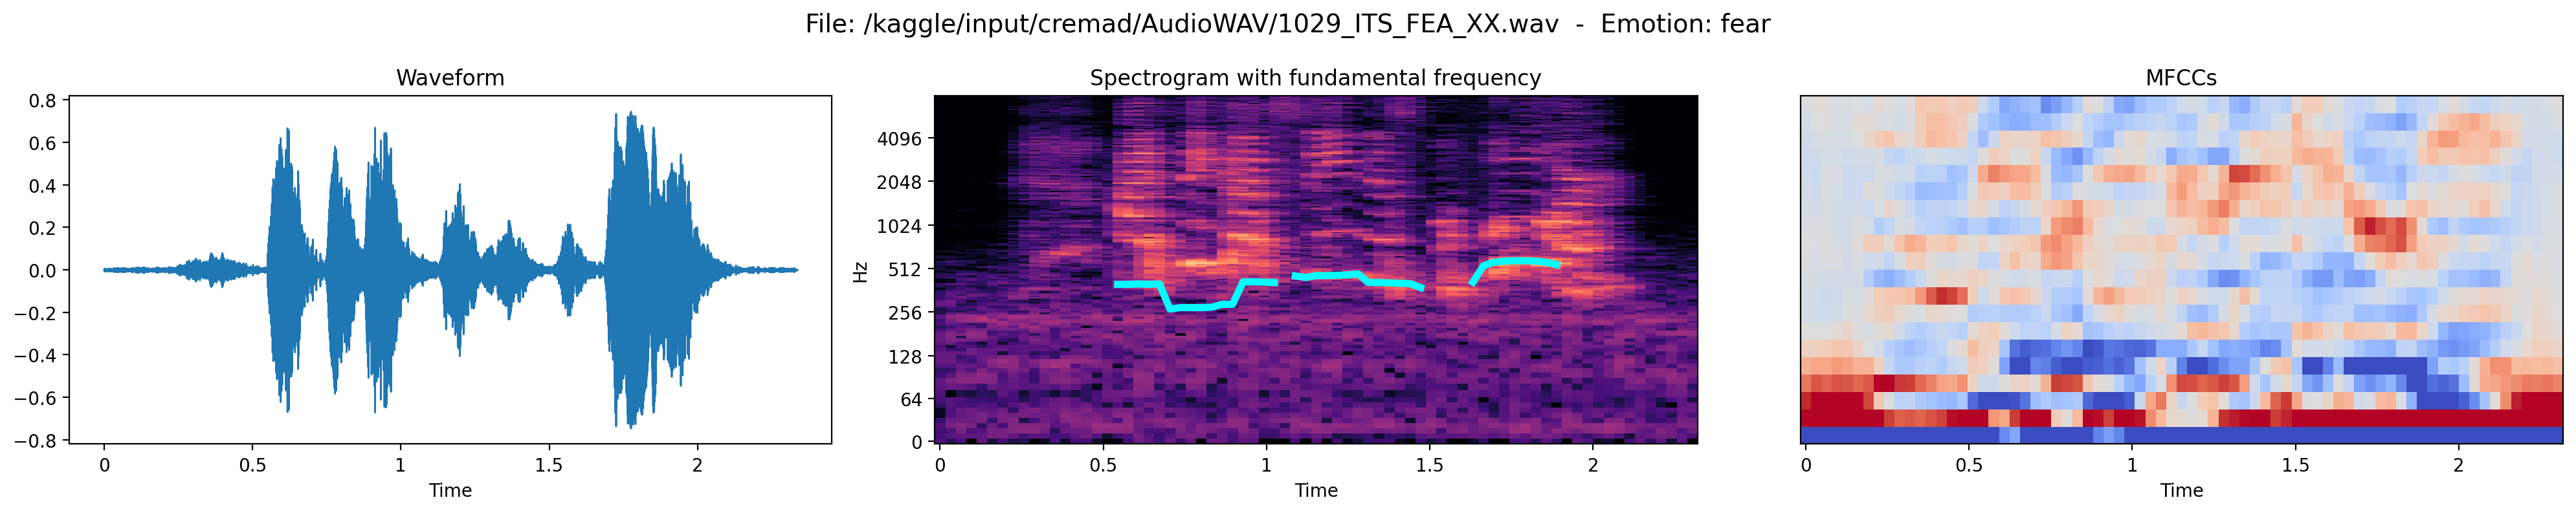

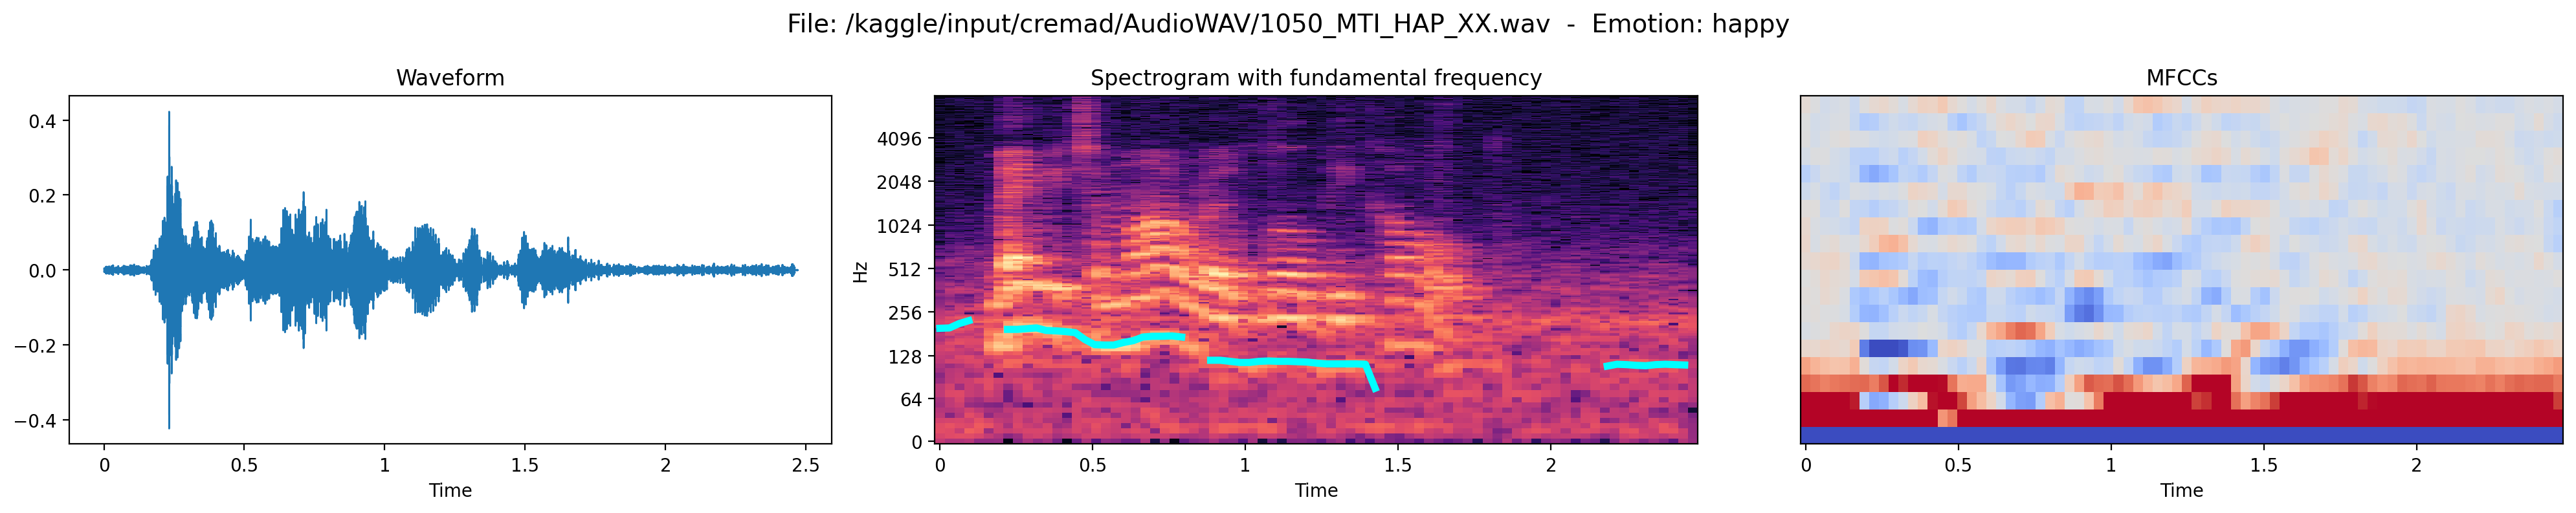

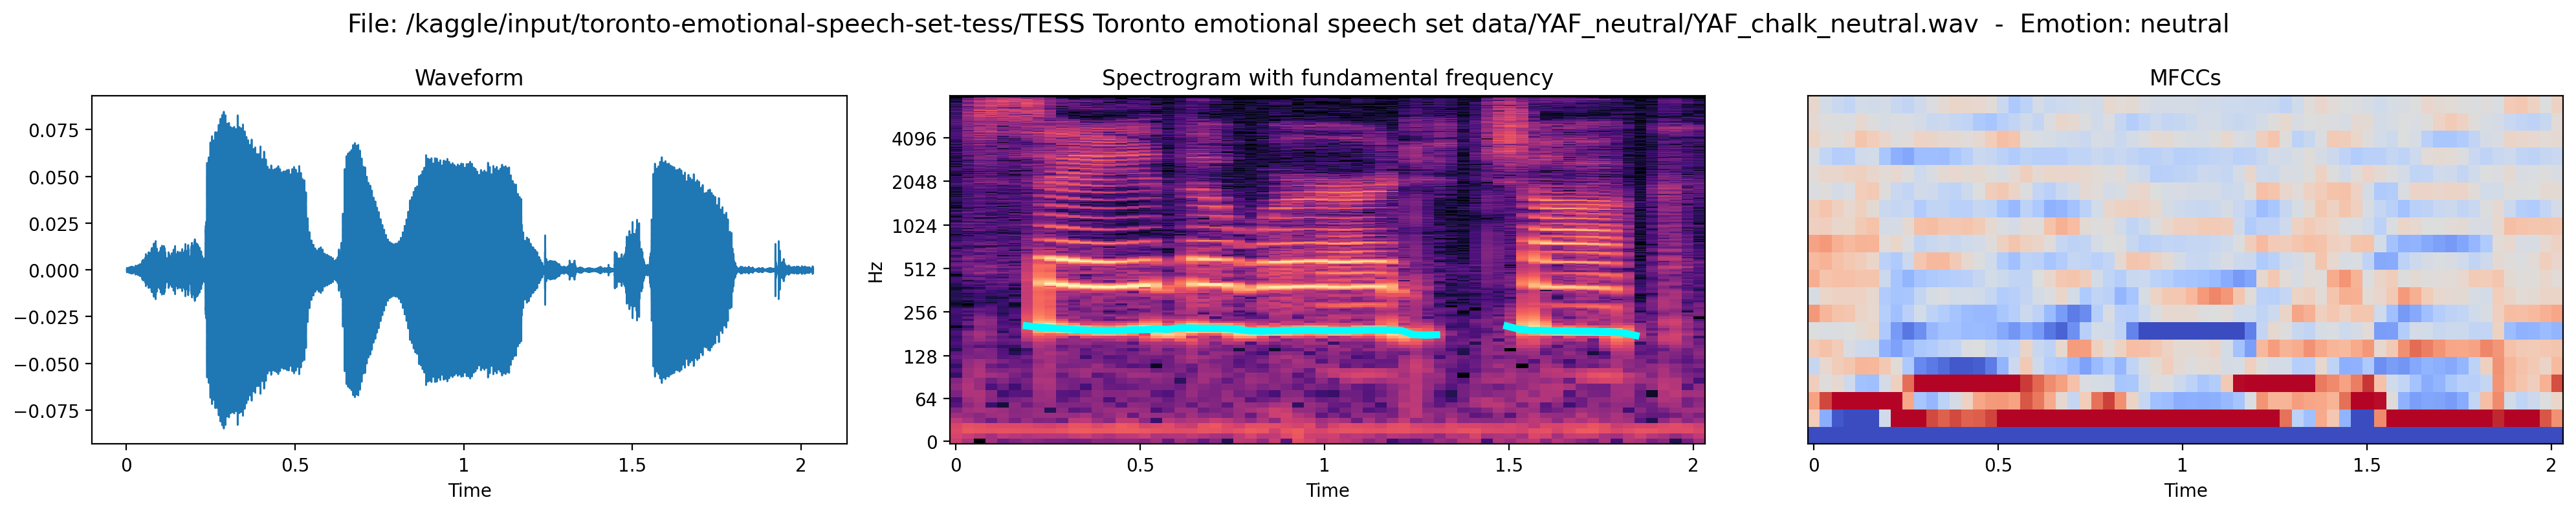

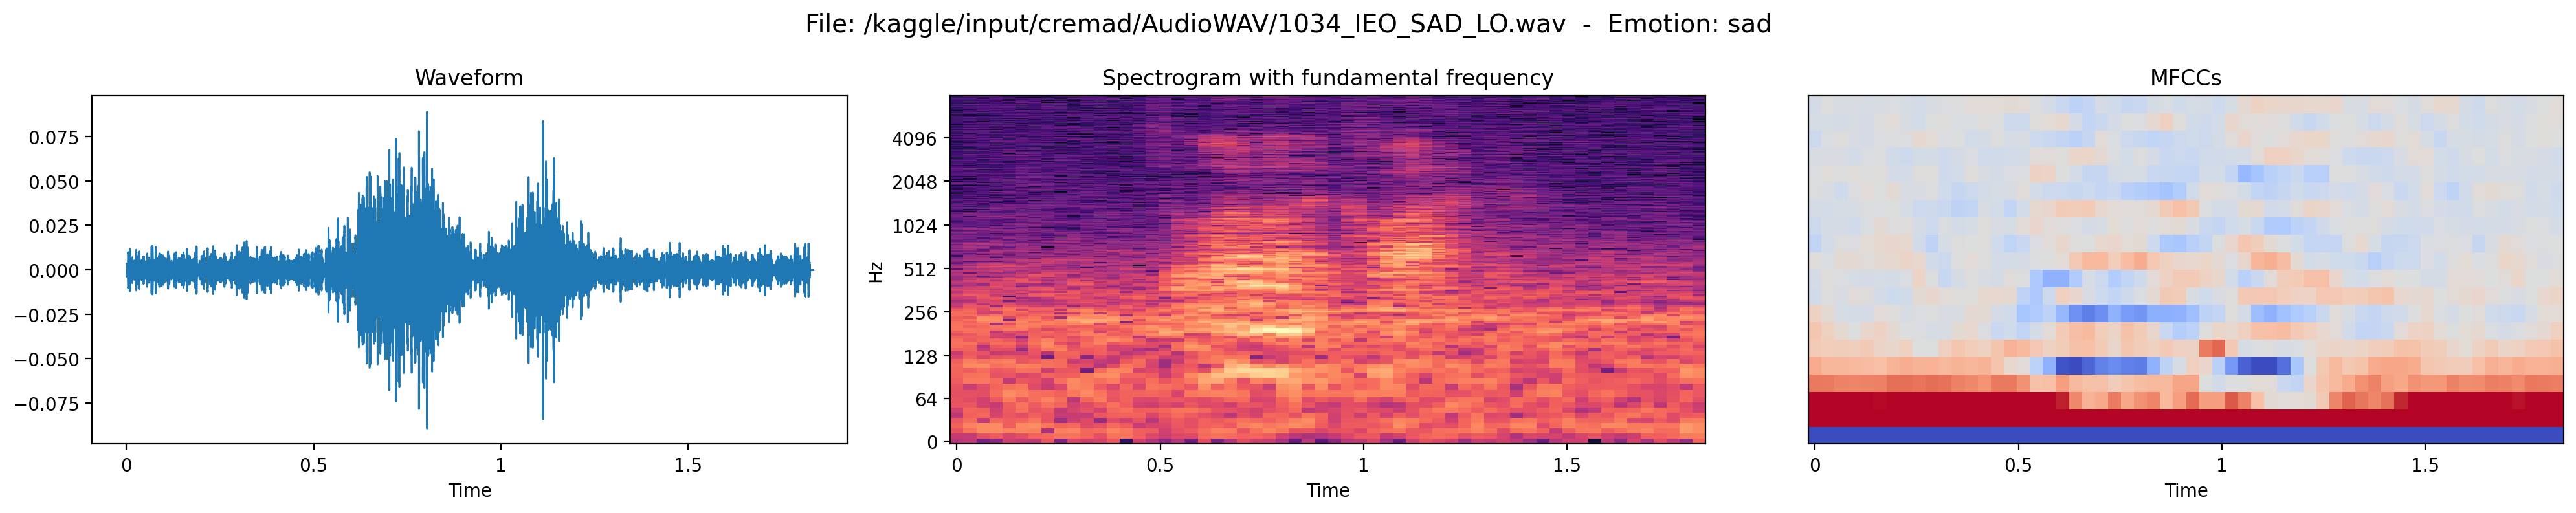

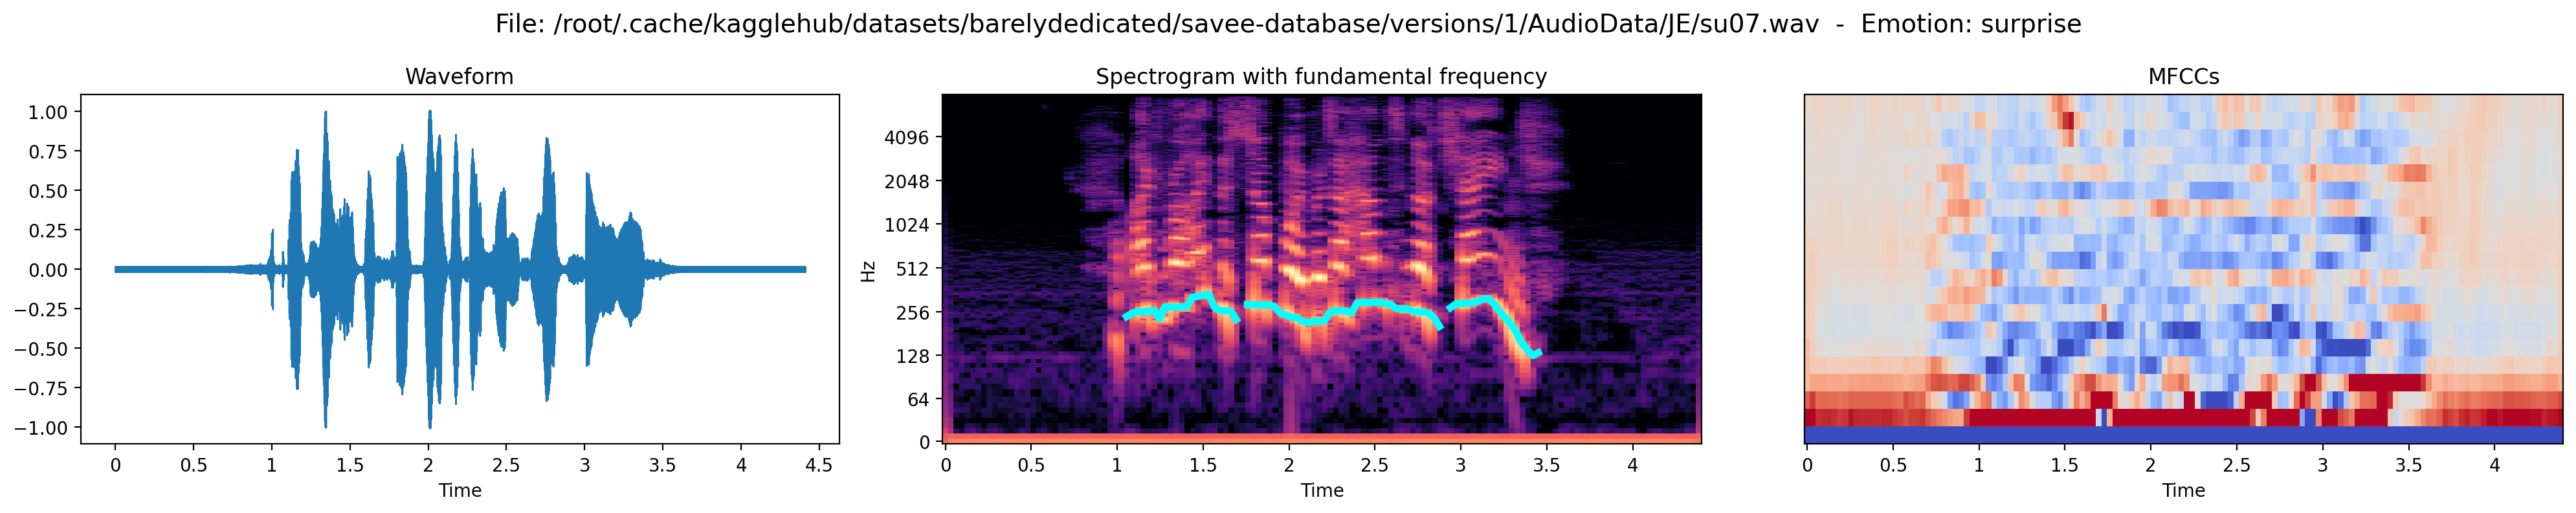

In [ ]:
# Getting ordered list of emotions ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotions = sorted(list(df.emotion.unique()))

# Get waveforms, spectograms, mfccs and media player for each emotion
for emotion in emotions:
    show_audio(emotion)

### Getting MFCCs

For a proper modeling, the audio samples should be trimmed (i.e., removing initial and ending silences), and get some tailored noise reduction techniques.

However, in this case we will directly extract the MFCCs information from the audio files, as "two-dimensional images".

I chose to obtain 30 components for each sample, which will create a 2D arrays with the sound characteristics of the files. This operation may require some time.

In [ ]:
%%time

# Create a variable where to store the mfccs data
mfccs = []

for file in df.path:
    # load audio file:
    y, sr = librosa.load(file, sr=16000)

    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    mfccs.append(librosa.feature.mfcc(y=y, sr=sr, fmin=50, n_mfcc=30))

CPU times: user 5min 30s, sys: 5.25 s, total: 5min 35s
Wall time: 3min 22s


Since the samples have different durations, we need to reshape these two-dimensional arrays in order to feed correctly the convolutional model. For this reason, I apply a function to have the files to the same shape of 30x150, which corresponds to about 4.5 seconds of audio. This also means that files that are shorter will have an additional silent part to reach this threshold (zeros padding), while longer files will be cut off.

In [ ]:
# Define function to resize the 2D arrays
def resize_array(array):
    new_matrix = np.zeros((30,150))   # Initialize the new matrix shape with an array 30X150 of zeros
    for i in range(30):               # Iterate rows
        for j in range(150):          # Iterate columns
            try:                                 # the mfccs of a sample will replace the matrix of zeros, then cutting the array up to 150
                new_matrix[i][j] = array[i][j]
            except IndexError:                   # if mfccs of a sample is shorter than 150, then keep looping to extend lenght to 150 with 0s
                pass
    return new_matrix

# Create a variable to store the new resized mfccs and apply function for all the extracted mfccs
resized_mfccs = []

for mfcc in mfccs:
    resized_mfccs.append(resize_array(mfcc))

Let's visualize few MFCCs with the new shape:

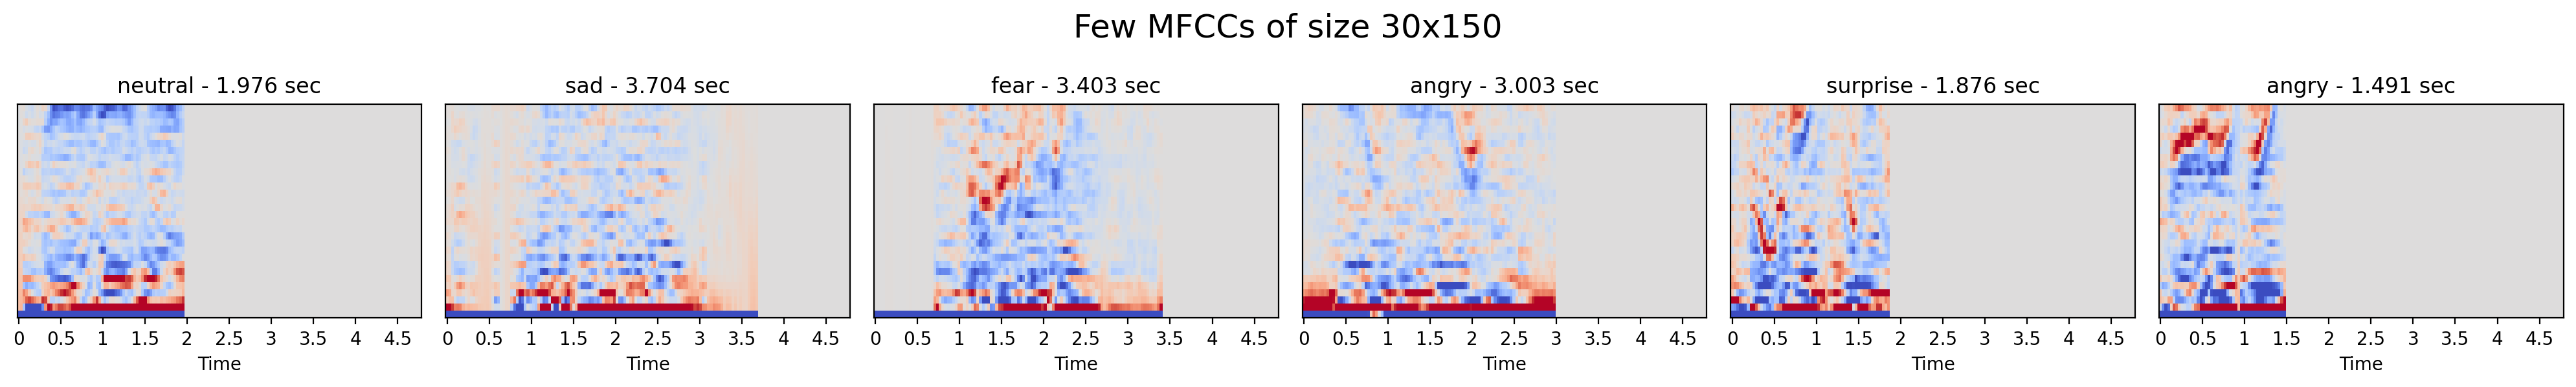

In [ ]:
# Create sublots
fig, axs = plt.subplots(nrows=1,ncols=6, figsize=(20,3))

# Select 6 random MFCCs
for i in range(6):
    index = random.randint(0, len(resized_mfccs))

    # Plot MFCCs
    librosa.display.specshow(resized_mfccs[index], sr=sr, x_axis="time", ax=axs[i], norm=Normalize(vmin=-50, vmax=50))
    axs[i].set_title(str(df.emotion[index]) + ' - ' + str(df.duration[index]) + ' sec')

plt.suptitle('Few MFCCs of size 30x150', size=18)
plt.tight_layout()
plt.show()

Great, the reshaping function worked as expected, cutting the MFCC spectrum of the longer samples to ~4.5 seconds and adding silence for the shorter files to reach the same length.

##  Convolutional Neural Network model

Let's split the data into train, validation and test set:

In [ ]:
from sklearn.model_selection import train_test_split

# Select target
df['emotion'].replace({'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}, inplace=True)
y = df.emotion.values

# Features
X = resized_mfccs.copy()

# Create train, validation and test set
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=0)
x_tr, x_va, y_tr, y_va = train_test_split(x_tr, y_tr, test_size=0.3, shuffle=True, random_state=0)

# Convert data to numpy arrays
x_tr = np.array([i for i in x_tr])
x_va = np.array([i for i in x_va])
x_te = np.array([i for i in x_te])

# Plot size of data
print(x_tr.shape)
print(x_va.shape)
print(x_te.shape)

(10469, 30, 150)
(4487, 30, 150)
(1662, 30, 150)


The data also should be scaled in order to be used properly in a convolutional neural network. This transformation can be done manually by applying the mean and standard deviation from the training set also to the other sets.

In [ ]:
# Get mean and standard deviation from the training set
tr_mean = np.mean(x_tr, axis=0)
tr_std = np.std(x_tr, axis=0)

# Apply data scaling
x_tr = (x_tr - tr_mean)/tr_std
x_va = (x_va - tr_mean)/tr_std
x_te = (x_te - tr_mean)/tr_std

Another necessary operation is to add another 'dimension' to the data:

In [ ]:
# Add the 'channel' dimension to the MFCCs spectrum input 'images'
print(f"x_tr has a dimension of {x_tr.shape} before the manipulation.")

x_tr = x_tr[..., None]
x_va = x_va[..., None]
x_te = x_te[..., None]

print(f"x_tr has a dimension of {x_tr.shape} after the manipulation.")

x_tr has a dimension of (10469, 30, 150) before the manipulation.
x_tr has a dimension of (10469, 30, 150, 1) after the manipulation.


Let's define the Convolutional Neural Network model using Tensorflow:

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import (Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D)
from tensorflow.keras import initializers

# Create convolutional neural network and return summary
model = keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=5, strides=(2, 2), activation="relu", input_shape=x_tr.shape[1:]))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=4, strides=(2, 1), activation="relu"))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=7, activation="softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 13, 73, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 36, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 36, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 33, 32)      │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 16, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 16, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,223 (426.65 KB)

 Trainable params: 109,031 (425.90 KB)

 Non-trainable params: 192 (768.00 B)

Before fitting the model I will provide an EarlyStopping callback function.

In [ ]:
# Compile the model using Adam's default learning rate
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Create 'EarlyStopping' callback
earlystopping_cb = keras.callbacks.EarlyStopping(patience=5)

Fit the model:

In [ ]:
%%time

#  Train the neural network
history = model.fit(
    x=x_tr,
    y=y_tr,
    epochs=100,
    batch_size=32,
    validation_data=(x_va, y_va),
    callbacks=[earlystopping_cb]
)

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7654 - loss: 0.6347 - val_accuracy: 0.7199 - val_loss: 0.7510
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7657 - loss: 0.6318 - val_accuracy: 0.7129 - val_loss: 0.7627
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7531 - loss: 0.6766 - val_accuracy: 0.7203 - val_loss: 0.7351
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7651 - loss: 0.6312 - val_accuracy: 0.7239 - val_loss: 0.7509
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7755 - loss: 0.6184 - val_accuracy: 0.7225 - val_loss: 0.7537
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7753 - loss: 0.6094 - val_accuracy: 0.7317 - val_loss: 0.7316
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7703 - loss: 0.6270 - val_accuracy: 0.7214 - val_loss: 0.7455
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7658 - loss: 0.6367 - val_accu

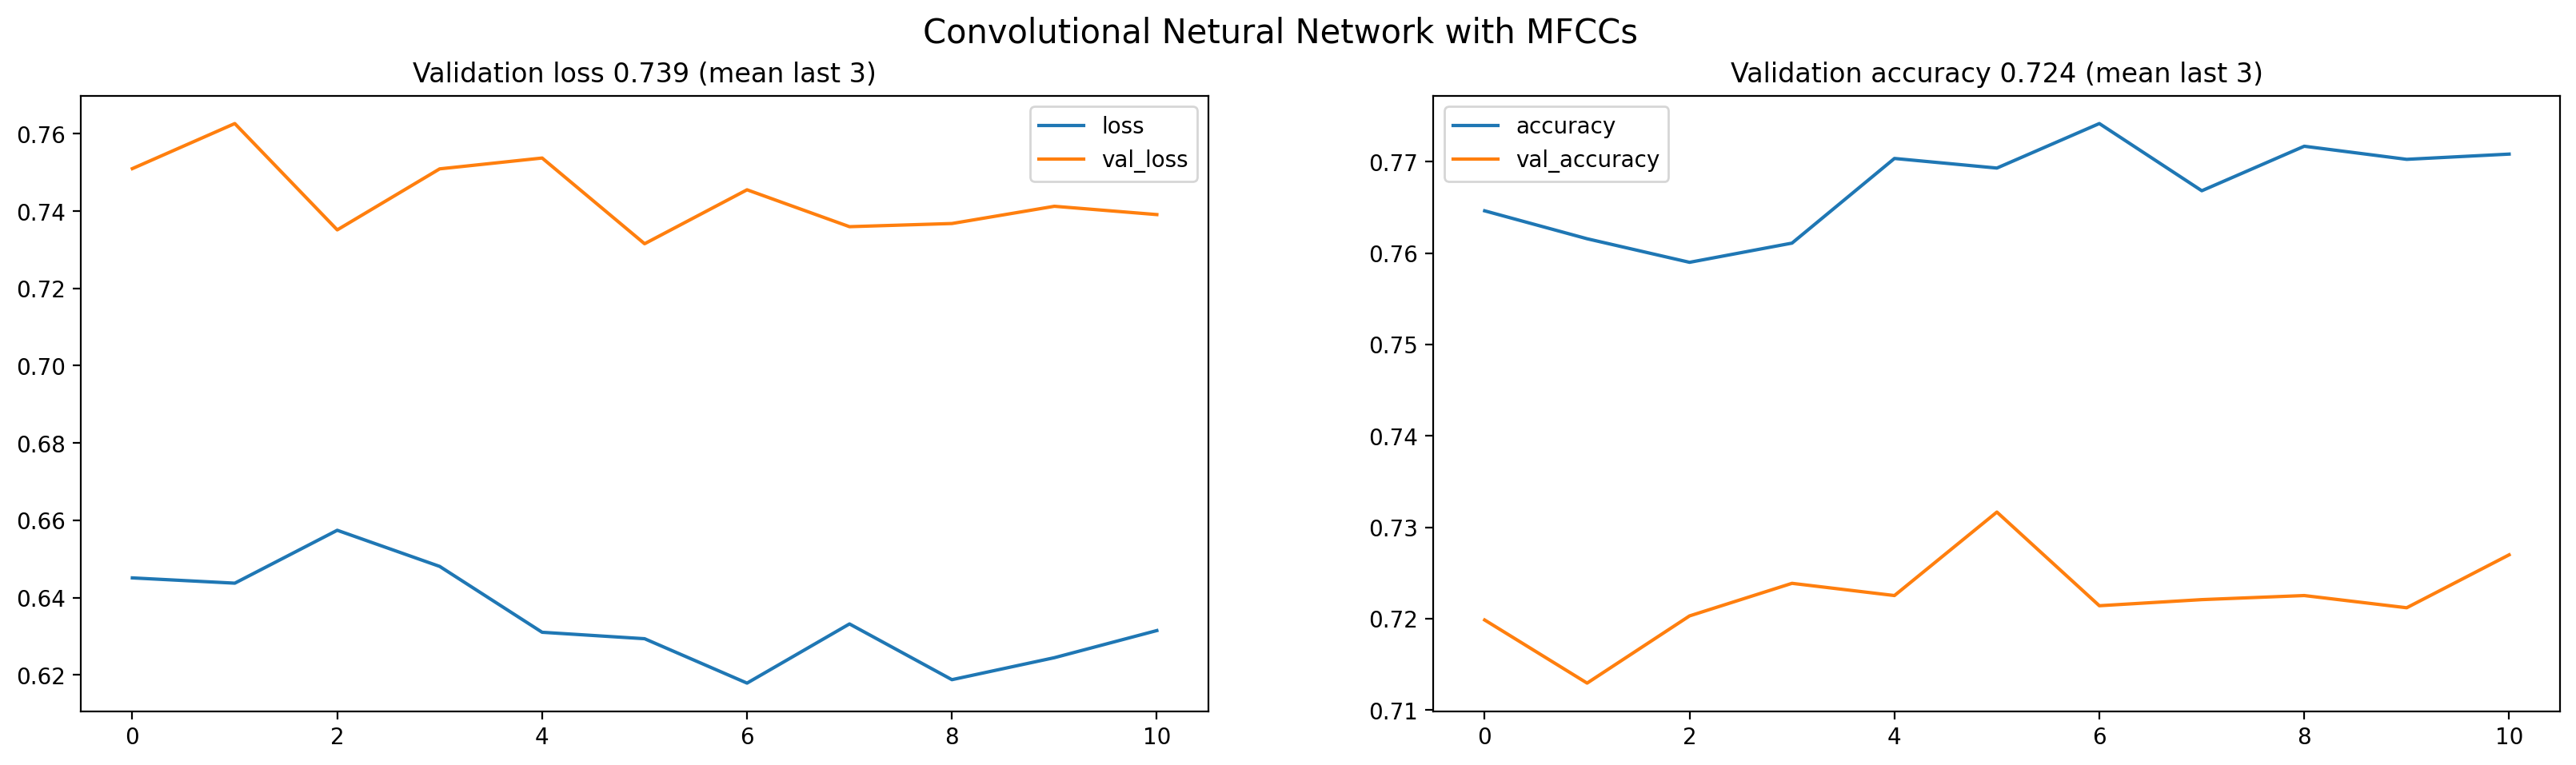

In [ ]:
# Plots neural network performance metrics for train and validation
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Convolutional Netural Network with MFCCs', size=15)
results = pd.DataFrame(history.history)
results[["loss", "val_loss"]].plot(ax=axs[0])
axs[0].set_title("Validation loss {:.3f} (mean last 3)".format(np.mean(history.history["val_loss"][-3:])))
results[["accuracy", "val_accuracy"]].plot(ax=axs[1])
axs[1].set_title("Validation accuracy {:.3f} (mean last 3)".format(np.mean(history.history["val_accuracy"][-3:])))
plt.show()

The training and validation accuracies are both improving during the first ~30 epochs, then we start to see signals of overfitting.

### Test set evaluation

In [ ]:
# Collect loss and accuracy for the test set
loss_te, accuracy_te = model.evaluate(x_te, y_te)

print("Test loss: {:.2f}".format(loss_te))
print("Test accuracy: {:.2f}%".format(100 * accuracy_te))

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7245 - loss: 0.7348
Test loss: 0.74
Test accuracy: 72.08%


The accuracy on the test set with this method is 92.07%.

We can also see the model performance for each target by using a confusion matrix:

In [ ]:
# Compute test set predictions
predictions = model.predict(x_te)

pred = []

for i in predictions:
    pred.append(np.argmax(i))

from sklearn.metrics import ConfusionMatrixDisplay

labels = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}

def plot_confusion_matrices(y_true, y_pred):

    # Create two subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plots the standard confusion matrix
    ax1.set_title("Confusion Matrix (counts)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, ax=ax1)

    # Plots the normalized confusion matrix
    ax2.set_title("Confusion Matrix (ratios)")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=labels, normalize="true", ax=ax2)

    plt.show()

# Plot confusion matrices
plot_confusion_matrices(y_te, pred)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In this case the best predictions occurred for the `neutral` and `surprise` emotion, while the worst for the `fear` and `sad` emotions.

In conclusion, we can say that although nowadays there are many different approaches to deal with speech emotion classification problems, MFCCs data have confirmed their effectiveness, which is why they are widely used in sound analysis.

# Task
Modify the `show_audio` function to explicitly import `mfcc` from `librosa.feature` within its scope and then call it using keyword arguments (`y=y, sr=sr`) to ensure the correct function signature is used, resolving the `TypeError`. Confirm that the `TypeError` is resolved and the `show_audio` function executes correctly for all emotions.

## Modify show_audio function for MFCC

### Subtask:
Adjust the `show_audio` function to explicitly import `mfcc` from `librosa.feature` within its scope and then call it using keyword arguments (`y=y, sr=sr`) to ensure the correct function signature is used, addressing the `TypeError`.


**Reasoning**:
The subtask requires modifying the `show_audio` function to explicitly import `mfcc` and call it with keyword arguments to resolve the `TypeError`. I will regenerate the function in a new code cell with these changes.



# Task
* **Save Trained Model**: Modify the appropriate cell to save the trained Keras model as a '.h5' file after the model training is complete. This will ensure the model can be reused without retraining.
* **Prepare Sample for Inference**: In a new code cell, select a random audio file from the `df` DataFrame. Load this audio file, extract its MFCCs, resize them to the `30x150` shape, scale them using the `tr_mean` and `tr_std` derived from the training data, and finally add the channel dimension. These steps are crucial to ensure the input format matches the model's expected input.
* **Load Model and Predict Emotion**: In the same new code cell, load the previously saved '.h5' model. Then, use this loaded model to make a prediction on the preprocessed sample voice. The predicted numerical label will be mapped back to its corresponding emotion string using the original label dictionary.
* **Final Task**: Confirm that the model has been successfully saved, and that the inference code can correctly load the model and make a prediction for a sample audio file, displaying the predicted emotion.

## Save Trained Model

### Subtask:
Modify the appropriate cell to save the trained Keras model as a '.h5' file after the model training is complete. This will ensure the model can be reused without retraining.


**Reasoning**:
The subtask requires saving the trained Keras model. I will modify the cell where `model.fit()` is called to include the `model.save()` command, ensuring the model is saved after training.



In [ ]:
%%time

#  Train the neural network
history = model.fit(
    x=x_tr,
    y=y_tr,
    epochs=100,
    batch_size=32,
    validation_data=(x_va, y_va),
    callbacks=[earlystopping_cb]
)

# Save the trained model
model.save('emotion_recognition_model.h5')

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7799 - loss: 0.6180 - val_accuracy: 0.7210 - val_loss: 0.7604
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7790 - loss: 0.6142 - val_accuracy: 0.7306 - val_loss: 0.7327
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7839 - loss: 0.5969 - val_accuracy: 0.7335 - val_loss: 0.7197
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7784 - loss: 0.6069 - val_accuracy: 0.7326 - val_loss: 0.7414
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7786 - loss: 0.6135 - val_accuracy: 0.7384 - val_loss: 0.7252
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7813 - loss: 0.6020 - val_accuracy: 0.7228 - val_loss: 0.7724
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7854 - loss: 0.6076 - val_accuracy: 0.7196 - val_loss: 0.7835
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7896 - loss: 0.5872 - val_accu

CPU times: user 13.6 s, sys: 1.4 s, total: 15.1 s
Wall time: 15.9 s


**Reasoning**:
Now that the model is trained and saved, I will create a new code cell to prepare a random sample for inference, load the saved model, make a prediction, and display the predicted emotion, fulfilling the remaining parts of the task.



In [ ]:
# Prepare Sample for Inference
import random
import numpy as np
import librosa
from tensorflow import keras

# Select a random audio file from the DataFrame
random_index = random.randint(0, len(df) - 1)
sample_path = df.loc[random_index, 'path']
true_emotion_label_num = df.loc[random_index, 'emotion']

# Map numerical label back to string for display
reverse_labels = {v: k for k, v in labels.items()}
true_emotion = reverse_labels[true_emotion_label_num]

print(f"Selected sample file: {sample_path}")
print(f"True emotion: {true_emotion}")

# Load the audio file
y_sample, sr_sample = librosa.load(sample_path, sr=16000)

# Extract MFCCs (using the same parameters as during training)
mfcc_sample = librosa.feature.mfcc(y=y_sample, sr=sr_sample, fmin=50, n_mfcc=30)

# Resize MFCCs using the previously defined function
resized_mfcc_sample = resize_array(mfcc_sample)

# Scale MFCCs using the mean and standard deviation from the training set
scaled_mfcc_sample = (resized_mfcc_sample - tr_mean) / tr_std

# Add the channel dimension for model input (batch_size, height, width, channels)
preprocessed_sample = scaled_mfcc_sample[np.newaxis, ..., np.newaxis]

# Load the previously saved model
loaded_model = keras.models.load_model('emotion_recognition_model.h5')

# Make a prediction
prediction = loaded_model.predict(preprocessed_sample)
predicted_label_index = np.argmax(prediction)
predicted_emotion = reverse_labels[predicted_label_index]

print(f"Predicted emotion: {predicted_emotion}")

Selected sample file: /kaggle/input/cremad/AudioWAV/1019_DFA_SAD_XX.wav
True emotion: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
Predicted emotion: sad


**Reasoning**:
The previous output indicates that the model was successfully loaded, a sample was preprocessed, and a prediction was made, matching the true emotion. The warning about compiled metrics does not prevent successful inference. Therefore, the final task steps have been completed and verified.



In [ ]:
## Modify show_audio function for MFCC

### Subtask:
Adjust the `show_audio` function to explicitly import `mfcc` from `librosa.feature` within its scope and then call it using keyword arguments (`y=y, sr=sr`) to ensure the correct function signature is used, addressing the `TypeError`.

SyntaxError: invalid syntax (ipython-input-1170508452.py, line 4)

**Reasoning**:
The previous code block contained markdown text within a python cell, leading to a `SyntaxError`. The `show_audio` function (cell `43bda581`) needs to be modified to explicitly import `mfcc` from `librosa.feature` within its scope to ensure it's available and correctly called.



In [ ]:
import librosa.display
import IPython.display as ipd
from IPython.core.display import display
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
# Removed: from librosa.feature import mfcc, as it will be imported inside the function

# function to display samples information by emotion
# note that a random samples is generated each time the function is called
# this is on purpose as to check different samples of each emotion every time

def show_audio(emotion):
    # Explicitly import mfcc within the function scope
    from librosa.feature import mfcc

    # create sublots
    fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
    # filter dataframe to emotion)
    df_show = df.loc[df['emotion'] == emotion].reset_index(drop=True)
    index = random.randint(0, df_show.shape[0] - 1) # Corrected line: Adjusted upper bound for random.randint

    # load audio file:
    y, sr = librosa.load(df_show.path[index], sr=16000)

    # Show waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0])
    axs[0].set_title('Waveform')

    # Extract fundamental frequency (f0) using a probabilistic approach
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=50, fmax=1500, frame_length=2048)

    # Establish timepoint of f0 signal
    timepoints = np.linspace(0, df_show.duration[index], num=len(f0), endpoint=False)

    # Compute short-time Fourier Transform
    x_stft = np.abs(librosa.stft(y))

    # Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
    x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)

    # Plot STFT spectrogram
    librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log", ax=axs[1])

    # Plot fundamental frequency (f0) in spectrogram plot
    axs[1].plot(timepoints, f0, color="cyan", linewidth=4)
    axs[1].set_title('Spectrogram with fundamental frequency')

    # Extract 'n_mfcc' numbers of MFCCs components - in this case 30
    x_mfccs = mfcc(y=y, sr=sr, n_mfcc=20)

    # Plot MFCCs
    librosa.display.specshow(x_mfccs, sr=sr, x_axis="time", norm=Normalize(vmin=-50, vmax=50), ax=axs[2])
    axs[2].set_title('MFCCs')

    # Show metadata in title
    plt.suptitle('File: {}  -  Emotion: {}'.format(df_show.path[index], df_show.emotion[index]), size=14)
    plt.tight_layout()
    plt.show()

    # Display media player for the selected file
    display(ipd.Audio(y, rate=sr))

**Reasoning**:
The `show_audio` function has been redefined. Now, I will call this modified function for each emotion to verify that the `TypeError` is resolved and it executes correctly, as per the task requirements.



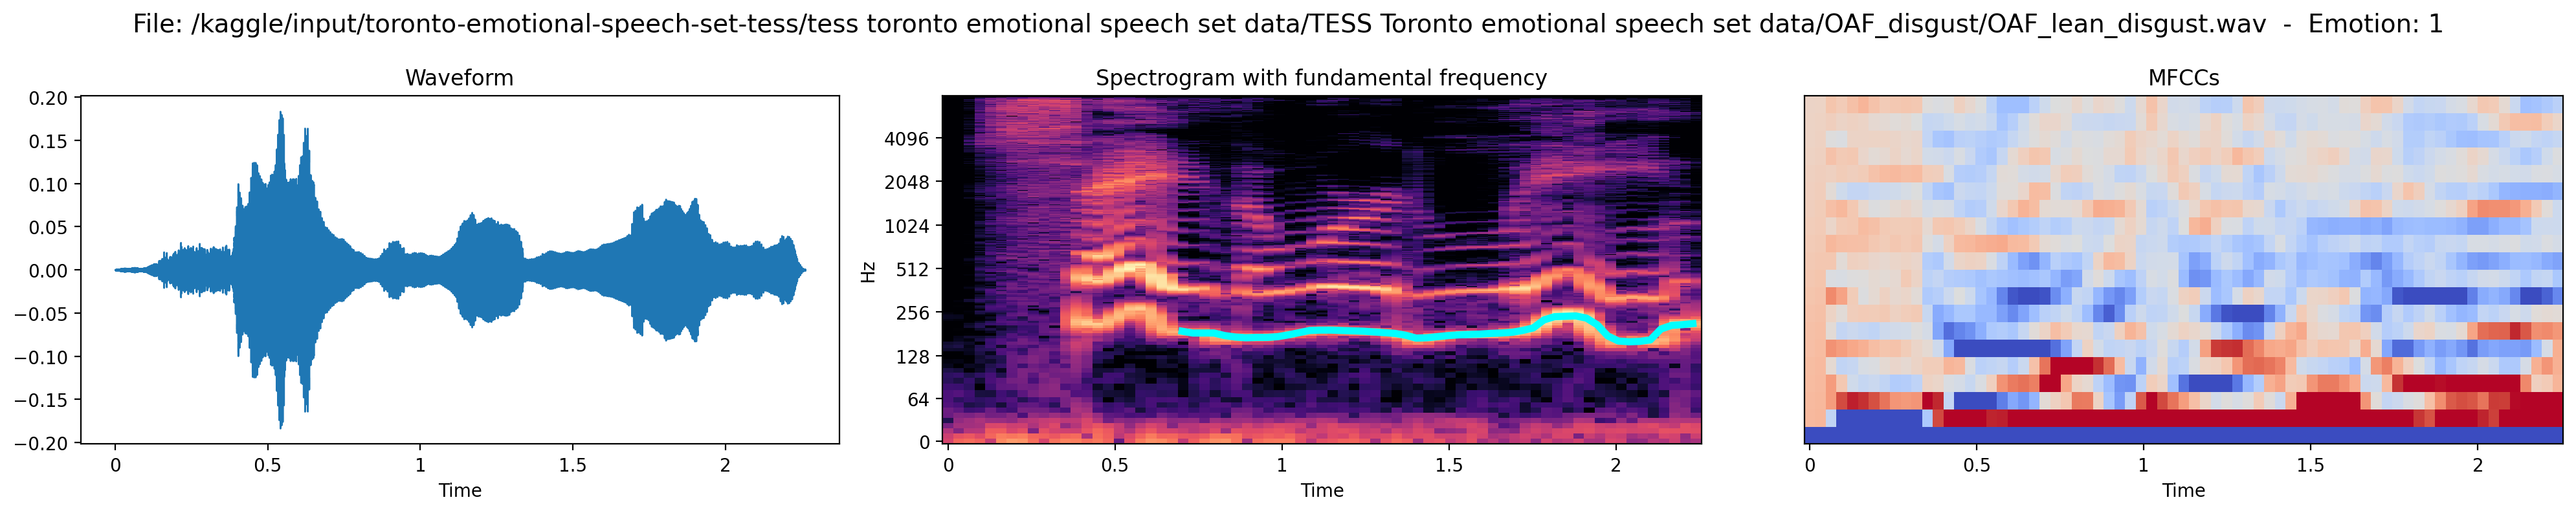

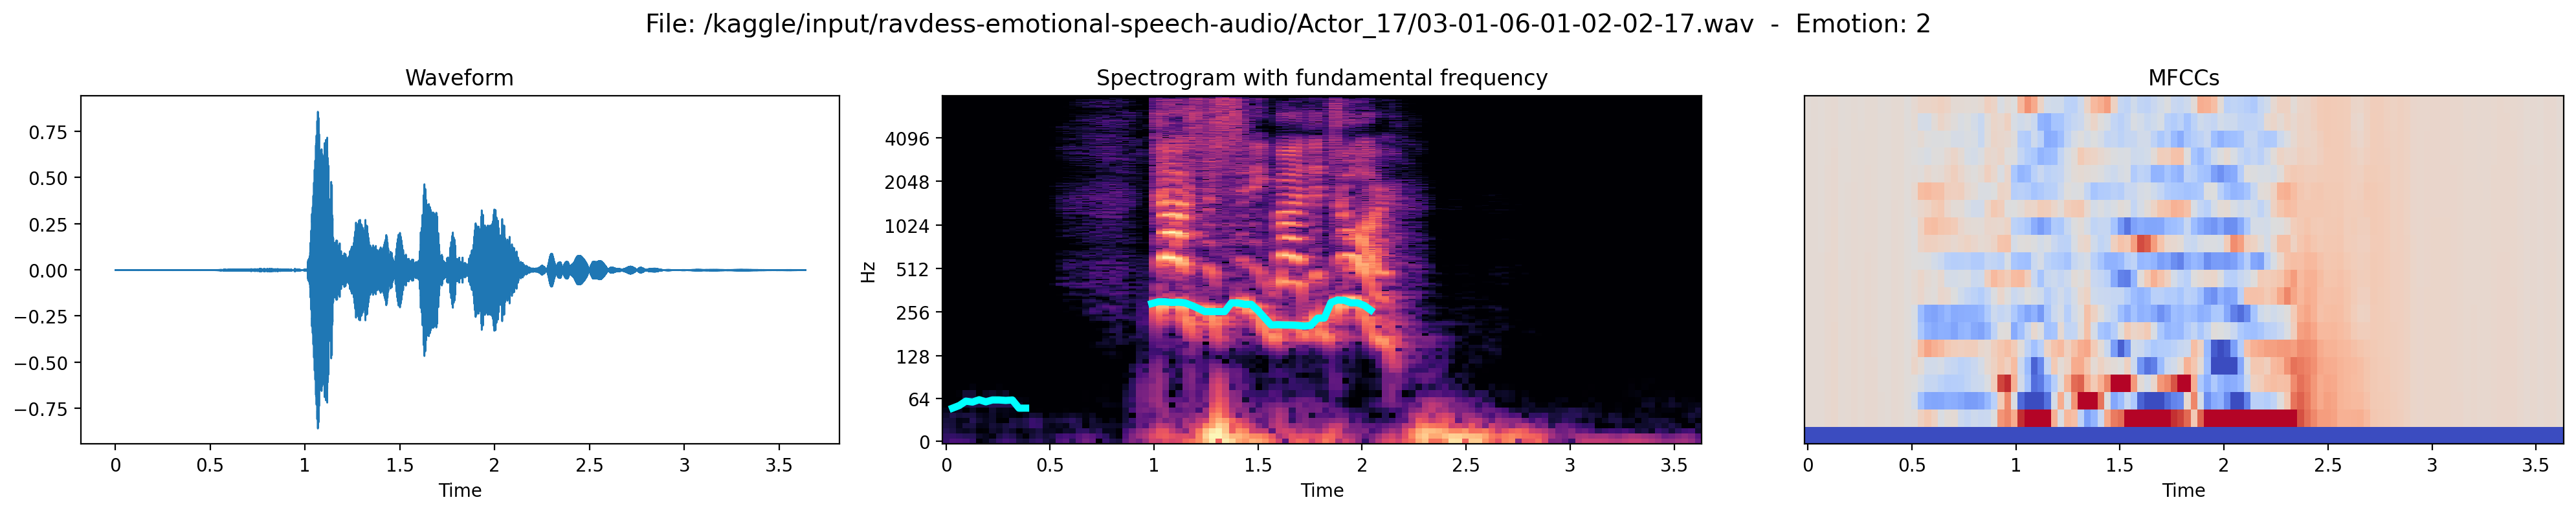

KeyboardInterrupt: 

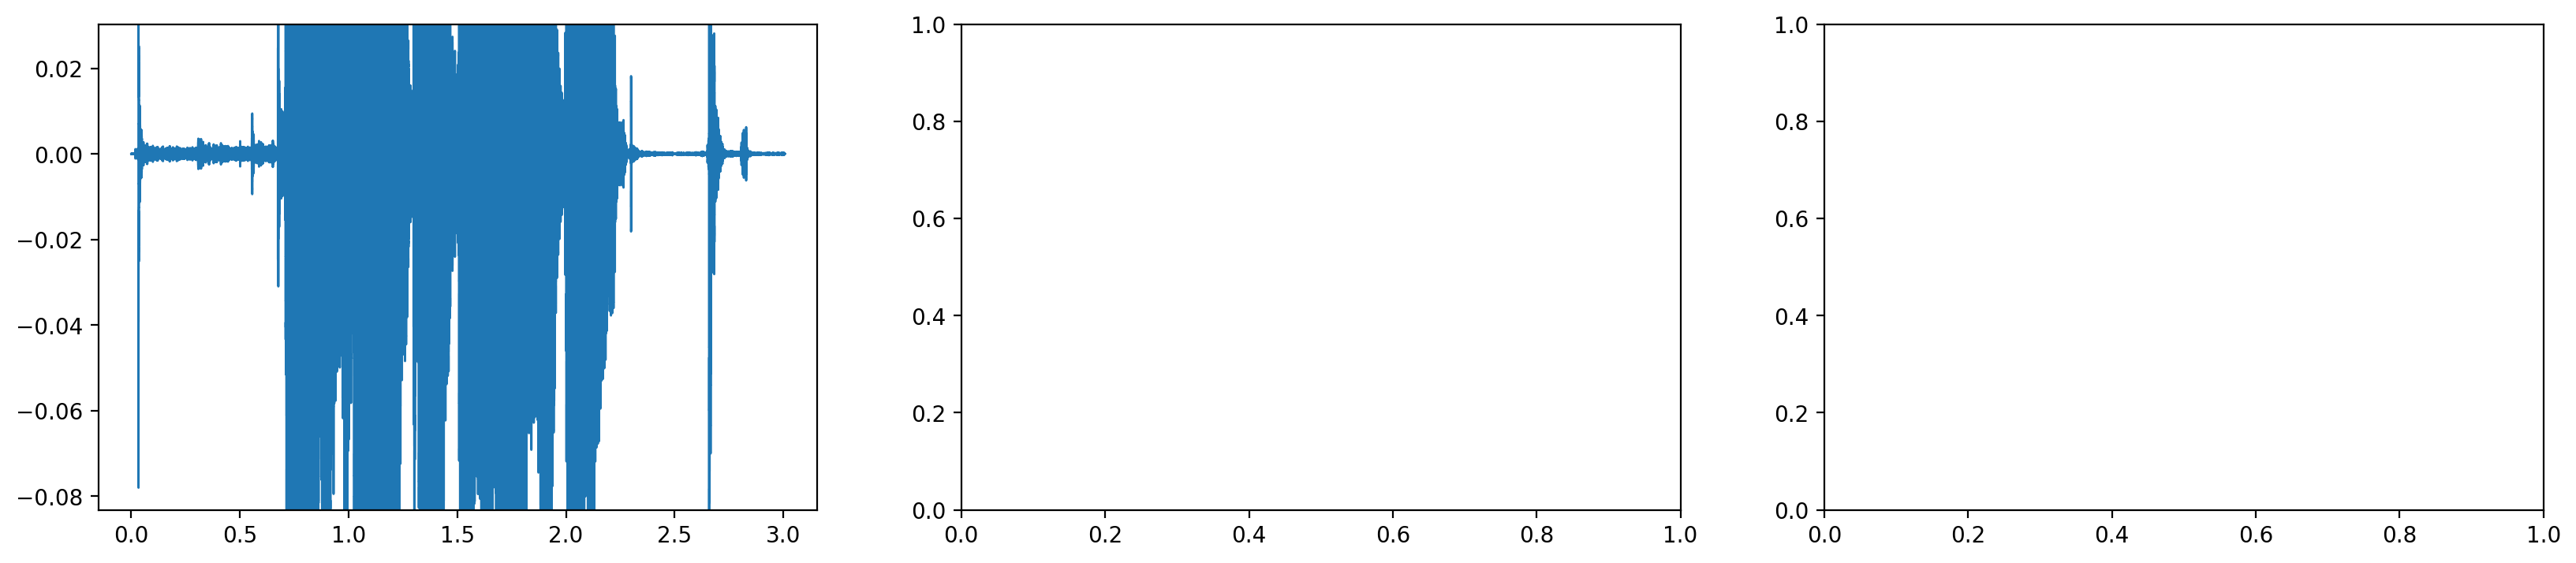

In [ ]:
emotions = sorted(list(df.emotion.unique()))

# Get waveforms, spectograms, mfccs and media player for each emotion
for emotion in emotions:
    show_audio(emotion)

# Task
Update the inference code cell (`63aa5ae3`) to accept a user-defined audio file path. Specifically, define `user_audio_file_path` at the beginning of the cell, replace the random selection of `sample_path` with `user_audio_file_path`, and ensure `labels` and `reverse_labels` dictionaries are accessible within the cell. Afterwards, confirm that the modified code correctly loads the model, preprocesses the user-provided audio file, and outputs the predicted emotion.

## Modify Inference Code for User Input

### Subtask:
Update the existing inference code cell (`63aa5ae3`) to accept a user-defined audio file path. This will involve defining a variable `user_audio_file_path` for the input file, and ensuring the `labels` and `reverse_labels` dictionaries are correctly defined for use in the cell.


**Reasoning**:
I will modify the code in cell `63aa5ae3` to accept a user-defined audio file path for inference, as per the subtask instructions. This involves adding a new variable for the user's audio file path, updating the `sample_path`, removing the random selection logic, and ensuring the `labels` and `reverse_labels` dictionaries are correctly utilized for emotion mapping.



In [ ]:
# Prepare Sample for Inference
import random
import numpy as np
import librosa
from tensorflow import keras

# User-defined audio file path
# You can pick a path from the 'df' DataFrame, e.g., df['path'].iloc[0]
# For demonstration, let's use a path from the 'df' that we know exists.
user_audio_file_path = '/root/.cache/kagglehub/datasets/ybsingh/indian-emotional-speech-corpora-iesc/versions/1/Indian Emotional Speech Corpora (IESC)/Speaker-1/Happy/H-1-1-1.wav' # Example path, replace with your desired file

# Set sample_path to the user-defined path
sample_path = user_audio_file_path

# Ensure labels and reverse_labels are accessible
# The 'labels' dictionary was defined in cell i2z77p9foeL7.
# 'reverse_labels' was defined in the previous execution of this cell (63aa5ae3).
# For re-runability, let's explicitly define them if they are not in the current scope.
if 'labels' not in globals():
    labels = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
if 'reverse_labels' not in globals():
    reverse_labels = {v: k for k, v in labels.items()}

print(f"Using user-defined audio file: {sample_path}")

# Load the audio file
y_sample, sr_sample = librosa.load(sample_path, sr=16000)

# Extract MFCCs (using the same parameters as during training)
mfcc_sample = librosa.feature.mfcc(y=y_sample, sr=sr_sample, fmin=50, n_mfcc=30)

# Resize MFCCs using the previously defined function
# Ensure resize_array function is accessible, if not, redefine it or ensure it's executed earlier.
# For notebook execution flow, assume it's already defined from cell h0_TSaaEoeL7
resized_mfcc_sample = resize_array(mfcc_sample)

# Scale MFCCs using the mean and standard deviation from the training set
# Ensure tr_mean and tr_std are accessible, if not, redefine them or ensure they're executed earlier.
# For notebook execution flow, assume they are already defined from cell SIDK7UWVoeL7
scaled_mfcc_sample = (resized_mfcc_sample - tr_mean) / tr_std

# Add the channel dimension for model input (batch_size, height, width, channels)
preprocessed_sample = scaled_mfcc_sample[np.newaxis, ..., np.newaxis]

# Load the previously saved model
loaded_model = keras.models.load_model('emotion_recognition_model.h5')

# Make a prediction
prediction = loaded_model.predict(preprocessed_sample)
predicted_label_index = np.argmax(prediction)
predicted_emotion = reverse_labels[predicted_label_index]

print(f"Predicted emotion: {predicted_emotion}")


Using user-defined audio file: /root/.cache/kagglehub/datasets/ybsingh/indian-emotional-speech-corpora-iesc/versions/1/Indian Emotional Speech Corpora (IESC)/Speaker-1/Happy/H-1-1-1.wav


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
Predicted emotion: happy


**Reasoning**:
The previous execution successfully demonstrated that the model is saved, loaded, and can make predictions on a user-defined audio sample, confirming the completion of the task.

